Mark Johnston


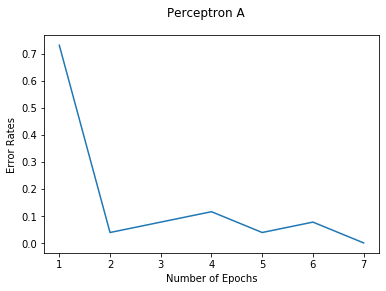

The following letters were wrongly classified: ['X'] 



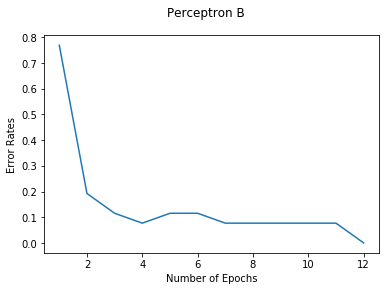

The following letters were wrongly classified: ['A', 'G', 'R', 'S'] 



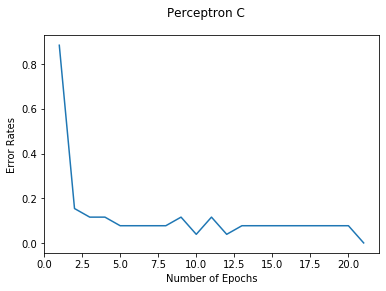

The following letters were wrongly classified: ['A'] 



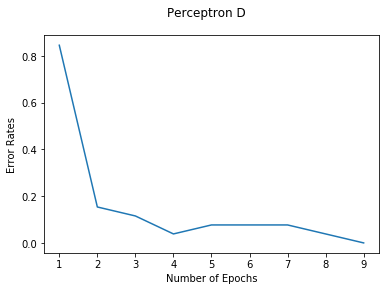

The following letters were wrongly classified: ['Q', 'W', 'X'] 



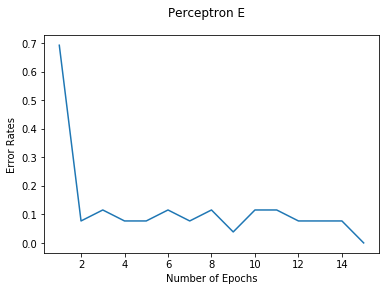

The following letters were wrongly classified: ['A', 'X'] 



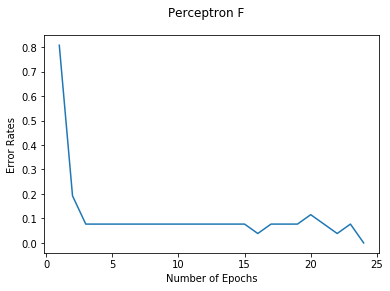

The following letters were wrongly classified: ['A', 'Q', 'X'] 



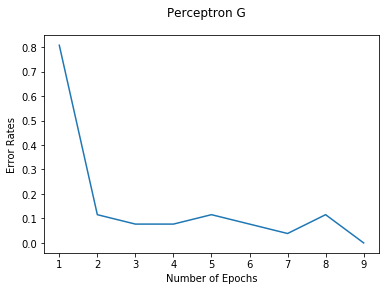

The following letters were wrongly classified: ['A', 'Q'] 



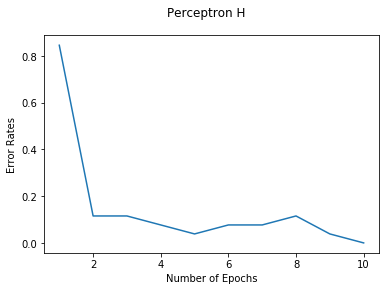

The following letters were wrongly classified: ['A', 'N', 'X'] 



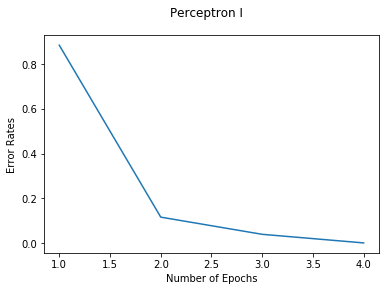

The following letters were wrongly classified: ['X'] 



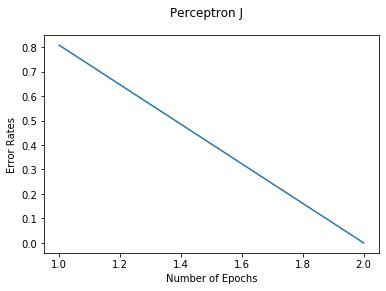

The following letters were wrongly classified: ['A', 'X'] 



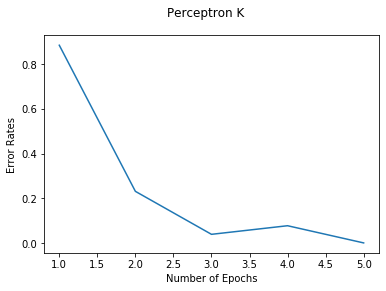

The following letters were wrongly classified: ['A', 'X'] 



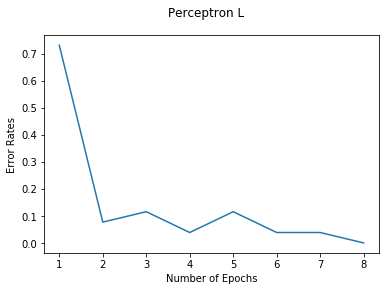

The following letters were wrongly classified: ['X'] 



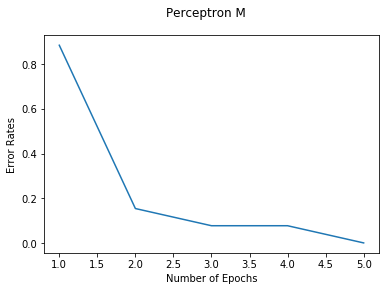

The following letters were wrongly classified: ['A', 'N', 'Q', 'W', 'X'] 



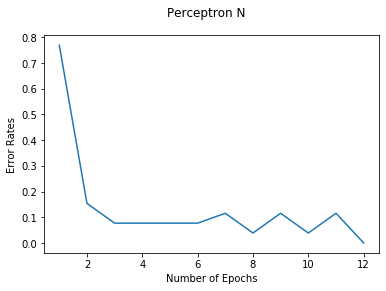

The following letters were wrongly classified: ['A', 'Q', 'X'] 



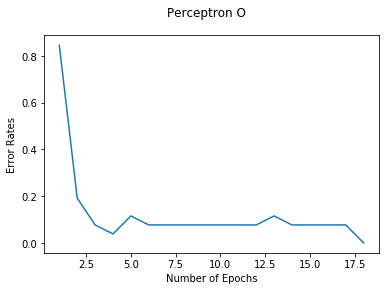

The following letters were wrongly classified: ['A', 'J'] 



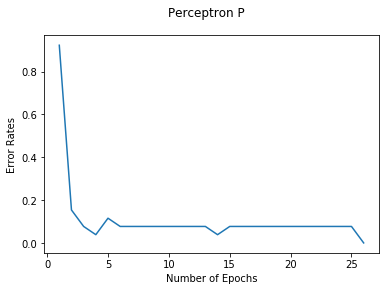

The following letters were wrongly classified: ['A', 'F', 'Q', 'R', 'Y'] 



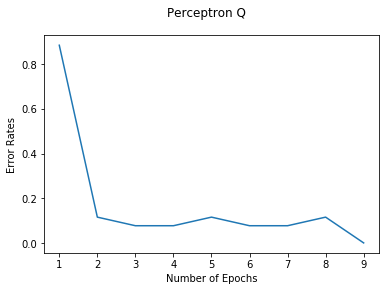

The following letters were wrongly classified: ['A', 'X'] 



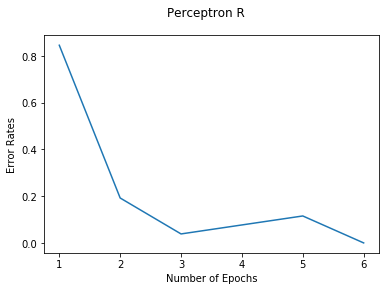

The following letters were wrongly classified: ['Q', 'X'] 



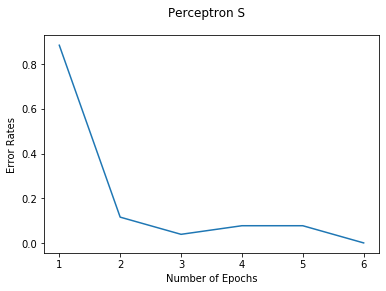

The following letters were wrongly classified: ['A', 'Q', 'X'] 



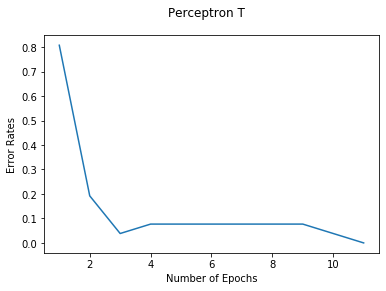

The following letters were wrongly classified: ['X'] 



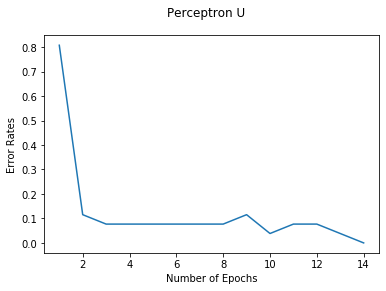

The following letters were wrongly classified: ['A', 'J', 'X', 'Y'] 



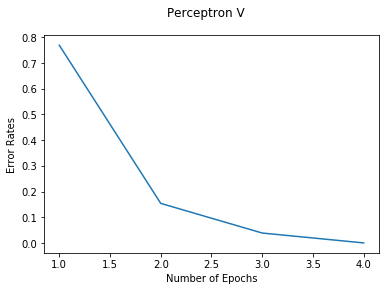

The following letters were wrongly classified: ['A', 'X'] 



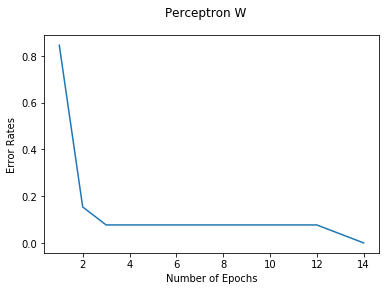

The following letters were wrongly classified: ['A', 'J', 'X'] 



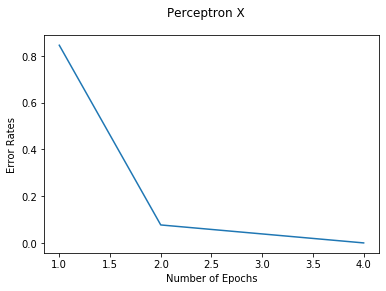

The following letters were wrongly classified: ['A'] 



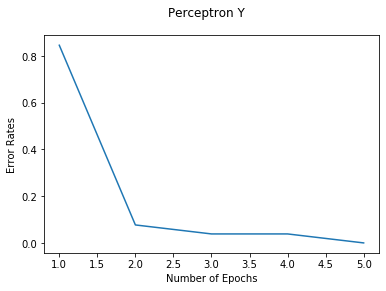

The following letters were wrongly classified: [] 



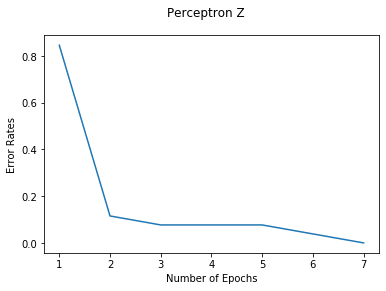

The following letters were wrongly classified: ['A', 'X'] 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# dataset.py

#
# 5x7 dot-matrix fonts
#
# Converted from hexadecimal and rotated counter-clockwise.
#
# Training data from https://github.com/noopkat/oled-font-5x7
# Test data from https://geoffg.net/Downloads/GLCD_Driver/glcd_library_1_0.h
#

TRAINING_DATA = [
    [
        '.###.',
        '#...#',
        '#...#',
        '#...#',
        '#####',
        '#...#',
        '#...#',
    ],
    [
        '####.',
        '#...#',
        '#...#',
        '####.',
        '#...#',
        '#...#',
        '####.',
    ],
    [
        '.###.',
        '#...#',
        '#....',
        '#....',
        '#....',
        '#...#',
        '.###.',
    ],
    [
        '###..',
        '#..#.',
        '#...#',
        '#...#',
        '#...#',
        '#..#.',
        '###..',
    ],
    [
        '#####',
        '#....',
        '#....',
        '####.',
        '#....',
        '#....',
        '#####',
    ],
    [
        '#####',
        '#....',
        '#....',
        '###..',
        '#....',
        '#....',
        '#....',
    ],
    [
        '.###.',
        '#...#',
        '#....',
        '#....',
        '#..##',
        '#...#',
        '.###.',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '#####',
        '#...#',
        '#...#',
        '#...#',
    ],
    [
        '.###.',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
        '.###.',
    ],
    [
        '..###',
        '...#.',
        '...#.',
        '...#.',
        '...#.',
        '#..#.',
        '.##..',
    ],
    [
        '#...#',
        '#..#.',
        '#.#..',
        '##...',
        '#.#..',
        '#..#.',
        '#...#',
    ],
    [
        '#....',
        '#....',
        '#....',
        '#....',
        '#....',
        '#....',
        '#####',
    ],
    [
        '#...#',
        '##.##',
        '#.#.#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
    ],
    [
        '#...#',
        '#...#',
        '##..#',
        '#.#.#',
        '#..##',
        '#...#',
        '#...#',
    ],
    [
        '.###.',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '.###.',
    ],
    [
        '####.',
        '#...#',
        '#...#',
        '####.',
        '#....',
        '#....',
        '#....',
    ],
    [
        '.###.',
        '#...#',
        '#...#',
        '#...#',
        '#.#.#',
        '#..#.',
        '.##.#',
    ],
    [
        '####.',
        '#...#',
        '#...#',
        '####.',
        '#.#..',
        '#..#.',
        '#...#',
    ],
    [
        '.####',
        '#....',
        '#....',
        '.###.',
        '....#',
        '....#',
        '####.',
    ],
    [
        '#####',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '.###.',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '.#.#.',
        '..#..',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '#.#.#',
        '#.#.#',
        '##.##',
        '#...#',
    ],
    [
        '#...#',
        '#...#',
        '.#.#.',
        '..#..',
        '.#.#.',
        '#...#',
        '#...#',
    ],
    [
        '#...#',
        '#...#',
        '.#.#.',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
    ],
    [
        '#####',
        '....#',
        '...#.',
        '..#..',
        '.#...',
        '#....',
        '#####',
    ],
]

TEST_DATA = [
    [
        '..#..',
        '.#.#.',
        '#...#',
        '#...#',
        '#####',
        '#...#',
        '#...#',
    ],
    [
        '.###.',
        '#...#',
        '#...#',
        '####.',
        '#...#',
        '#...#',
        '####.',
    ],
    [
        '.###.',
        '#...#',
        '#....',
        '#....',
        '#....',
        '#...#',
        '.###.',
    ],
    [
        '####.',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '####.',
    ],
    [
        '#####',
        '#....',
        '#....',
        '###..',
        '#....',
        '#....',
        '#####',
    ],
    [
        '#####',
        '#....',
        '#....',
        '####.',
        '#....',
        '#....',
        '#....',
    ],
    [
        '.###.',
        '#...#',
        '#....',
        '#..##',
        '#...#',
        '#...#',
        '.###.',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '#####',
        '#...#',
        '#...#',
        '#...#',
    ],
    [
        '.###.',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
        '.###.',
    ],
    [
        '....#',
        '....#',
        '....#',
        '....#',
        '#...#',
        '#...#',
        '.###.',
    ],
    [
        '#...#',
        '#..#.',
        '#.#..',
        '##...',
        '#.#..',
        '#..#.',
        '#...#',
    ],
    [
        '#....',
        '#....',
        '#....',
        '#....',
        '#....',
        '#....',
        '#####',
    ],
    [
        '#...#',
        '##.##',
        '#.#.#',
        '#.#.#',
        '#...#',
        '#...#',
        '#...#',
    ],
    [
        '#...#',
        '##..#',
        '#.#.#',
        '#..##',
        '#...#',
        '#...#',
        '#...#',
    ],
    [
        '.###.',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '.###.',
    ],
    [
        '####.',
        '#...#',
        '#...#',
        '####.',
        '#....',
        '#....',
        '#....',
    ],
    [
        '.###.',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '.###.',
        '....#',
    ],
    [
        '####.',
        '#...#',
        '#...#',
        '####.',
        '#...#',
        '#...#',
        '#...#',
    ],
    [
        '.###.',
        '#...#',
        '#....',
        '.###.',
        '....#',
        '#...#',
        '.###.',
    ],
    [
        '#####',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
        '..#..',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '.###.',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '.#.#.',
        '..#..',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '#...#',
        '#.#.#',
        '##.##',
        '#...#',
    ],
    [
        '#...#',
        '.#.#.',
        '..#..',
        '..#..',
        '..#..',
        '.#.#.',
        '#...#',
    ],
    [
        '#...#',
        '#...#',
        '#...#',
        '.#.#.',
        '..#..',
        '..#..',
        '..#..',
    ],
    [
        '#####',
        '....#',
        '...#.',
        '..#..',
        '.#...',
        '#....',
        '#####',
    ],
]

#got this from the Hebb Net example
def char2vec(char):
  return [
          0 if pixel == '.' else 1
          for line in char
          for pixel in line
  ]

TRAINING_SET = []

for i in range(26):
  TRAINING_SET.append(char2vec(TRAINING_DATA[i]))
  TRAINING_SET[i].insert(0, 1)      #extra 1 in front for bias

TEST_SET = []

for i in range(26):
  TEST_SET.append(char2vec(TEST_DATA[i]))
  TEST_SET[i].insert(0, 1)          #extra 1 in front for bias

#convert the numbers 0-25 into corresponding alphabet letters
def conv_num(x):
  return chr(65 + x)

def threshold(x):
  return 1 if x >= 0 else 0

def train(letter):    #letter corresponds to it's position in alphabet, i.e. B = 1
  r = .05

  weights = []

  for i in range(36):
    weights.append(np.random.random_sample())

  error = .01
  error_rates = []

  while True: 
    sum = 0
    for j in range(26):
      actual = threshold(np.dot(weights, TRAINING_SET[j]))
      if j == letter:
        sum += abs(1 - actual)
      else:
        sum += abs(0 - actual)
      for i in range(35):
        if j == letter:
          weights[i] = weights[i] + r * (1 - actual) * TRAINING_SET[j][i]
        else:
          weights[i] = weights[i] + r * (0 - actual) * TRAINING_SET[j][i]
    error_check = sum / 26
    error_rates.append(error_check)
    if error_check < error:
      break

  return weights, error_rates

def test(weights, letter):
  wrong = []              #array that contains all the wrongly classified letters
  for i in range(26):
    prediction = threshold(np.dot(weights, TEST_SET[i]))
    if i != letter:
      if prediction != 0:
        wrong.append(conv_num(i))
  return wrong

def plot_error(error_rates, letter):
  plt.plot(np.arange(1, len(error_rates) + 1), error_rates)
  plt.suptitle("Perceptron {}".format(conv_num(letter)))
  plt.xlabel("Number of Epochs")
  plt.ylabel("Error Rates")
  plt.show()

#train, test, and plot the results for all the perceptrons
for i in range(26):
  testing, errors = train(i)
  wrong = test(testing, i)
  plot_error(errors, i)
  print("The following letters were wrongly classified:", wrong, "\n")


**Question:** Are all letters in the training set linearly separable?
  >Yes, all the letters were linearly separable. Some took more epochs, even up to 20, but eventually it classified everything correctly

**Question:** Are all letters in the test set correctly classified?
  >No, most of the perceptrons misclassified at least one letter

**Question:** How similar are the missclassified items to the items in the training set?
  >Most of the misclassified letters had several differences. 'A' and 'X' were commonly misclassified, each having about 5-6 pixels that were different.